## Load Dataset and Packages

In [135]:
# from google.colab import drive 
# drive.mount('/content/gdrive')
import pandas as pd 
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [136]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/jasmineli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasmineli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasmineli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [137]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#Data Exploration

##Word Frequency Plot

In [138]:
def word_frequency(sentence):
  # joins all the sentenses
  sentence =" ".join(sentence)
  # creates tokens, creates lower class, removes numbers and lemmatizes the words
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  #counts the words, pairs and trigrams
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  #creates 3 data frames and returns thems
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq,word_pairs,trigrams,new_tokens

In [139]:
data2, data3, data4, tokens = word_frequency(df['title_orig'].tolist())

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

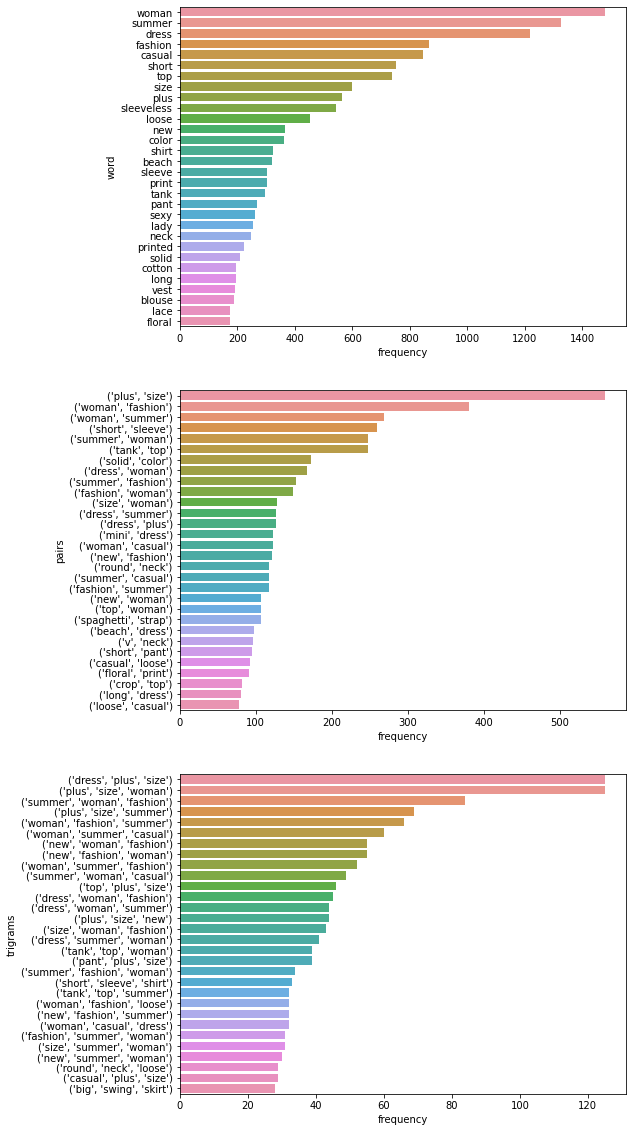

In [140]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

In [141]:
from collections import Counter
recounted = Counter(df["units_sold"])
recounted.most_common()

[(100, 509),
 (1000, 405),
 (5000, 217),
 (10000, 177),
 (20000, 103),
 (50, 76),
 (10, 49),
 (50000, 17),
 (100000, 6),
 (8, 4),
 (1, 3),
 (7, 2),
 (2, 2),
 (3, 2),
 (6, 1)]

##Metadata Features

In [142]:
recounted = Counter(np.log(df["units_sold"]))
recounted.most_common()

[(4.605170185988092, 509),
 (6.907755278982137, 405),
 (8.517193191416238, 217),
 (9.210340371976184, 177),
 (9.903487552536127, 103),
 (3.912023005428146, 76),
 (2.302585092994046, 49),
 (10.819778284410283, 17),
 (11.512925464970229, 6),
 (2.0794415416798357, 4),
 (0.0, 3),
 (1.9459101490553132, 2),
 (0.6931471805599453, 2),
 (1.0986122886681098, 2),
 (1.791759469228055, 1)]

In [143]:
recounted = Counter(df["currency_buyer"])
recounted

Counter({'EUR': 1573})

In [144]:
recounted = Counter(df["badges_count"])
recounted

Counter({0: 1422, 1: 138, 2: 11, 3: 2})

In [145]:
recounted = Counter(df["badge_local_product"])
recounted

Counter({0: 1544, 1: 29})

In [146]:
recounted = Counter(df["badge_product_quality"])
recounted

Counter({0: 1456, 1: 117})

In [147]:
recounted = Counter(df["badge_fast_shipping"])
recounted

Counter({0: 1553, 1: 20})

In [148]:
recounted = Counter(df["urgency_text"])
recounted.most_common()

[(nan, 1100),
 ('Quantité limitée !', 472),
 ('Réduction sur les achats en gros', 1)]

In [149]:
recounted = Counter(df["product_variation_size_id"])
recounted.most_common()

[('S', 641),
 ('XS', 356),
 ('M', 200),
 ('XXS', 100),
 ('L', 49),
 ('S.', 18),
 ('XL', 17),
 ('XXL', 15),
 (nan, 14),
 ('XXXS', 6),
 ('s', 5),
 ('XS.', 5),
 ('Size S', 5),
 ('4XL', 5),
 ('Size-XS', 4),
 ('M.', 4),
 ('SIZE XS', 4),
 ('2XL', 4),
 ('2pcs', 3),
 ('33', 3),
 ('SizeL', 3),
 ('34', 3),
 ('Size-S', 3),
 ('10 ml', 3),
 ('Suit-S', 2),
 ('XXXXXL', 2),
 ('EU 35', 2),
 ('Size S.', 2),
 ('3XL', 2),
 ('29', 2),
 ('One Size', 2),
 ('1', 2),
 ('5XL', 2),
 ('Size M', 2),
 ('XXXXL', 2),
 ('size S', 2),
 ('35', 2),
 ('SIZE-XXS', 2),
 ('S(bust 88cm)', 2),
 ('Size -XXS', 2),
 ('25', 2),
 ('1 pc.', 2),
 ('S Pink', 2),
 ('Size4XL', 2),
 ('choose a size', 1),
 ('32/L', 1),
 ('4', 1),
 ('1m by 3m', 1),
 ('Women Size 36', 1),
 ('US 6.5 (EU 37)', 1),
 ('26(Waist 72cm 28inch)', 1),
 ('Size XXS', 1),
 ('1pc', 1),
 ('100 cm', 1),
 ('SIZE-4XL', 1),
 ('S/M(child)', 1),
 ('XXXL', 1),
 ('S..', 1),
 ('30 cm', 1),
 ('100 x 100cm(39.3 x 39.3inch)', 1),
 ('100pcs', 1),
 ('SIZE XXS', 1),
 ('Base & Top & Mat

##Product Color

In [150]:
def main_color(s):
  main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange", 
  "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white", 
  "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
  for key, value in main_color.items():
    if key in s:
      return value
  return "others"

In [151]:
product_color = df["product_color"]
product_color = [s.lower() if type(s) is str else 'nan' for s in product_color]
product_color = [main_color(s) for s in product_color]

In [152]:
recounted = Counter(product_color)
recounted.most_common()

[('black', 309),
 ('white', 282),
 ('blue', 162),
 ('red', 149),
 ('green', 145),
 ('pink', 120),
 ('yellow', 112),
 ('others', 86),
 ('gray', 85),
 ('purple', 55),
 ('orange', 33),
 ('brown', 15),
 ('khaki', 13),
 ('navy', 4),
 ('beige', 3)]

In [153]:
from matplotlib import colors
product_color = [(-0.1,-0.1,-0.1,-0.1) if s == "others" else colors.to_rgba(s) for s in product_color]

##Inspect Y: unit_sold

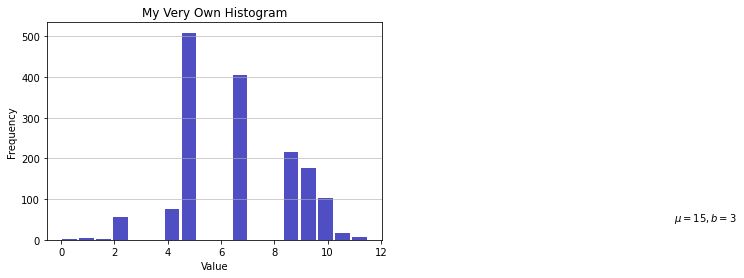

In [154]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=np.log(df["units_sold"]), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

#Feature Engineering


In [155]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


## Metadata

Product Color

In [156]:
df['product_color_rgb'] = [np.array(t) for t in product_color]

Log Prices

In [157]:
df['log_price'] = [np.log(p) for p in df["price"]]
df['log_retail_price'] = [np.log(p) for p in df["retail_price"]]

Log Merchant Rating Count

In [158]:
df['log_merchant_rating_count'] = np.log(df['merchant_rating_count'])

/Users/jasmineli/opt/anaconda3/envs/etsy/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Urgent Text

In [159]:
df['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df["urgency_text"]]

In [160]:
##Title Word2Vec

In [161]:
def process_sentence(sentence):
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  return new_tokens

In [162]:
titles = df['title_orig'].tolist()
data = [process_sentence(t) for t in titles]

Implemented based on official documentation: https://radimrehurek.com/gensim/models/word2vec.html.

In [163]:
model = gensim.models.Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)
model.train(data,total_examples=len(data),epochs=10)

(117367, 232280)

In [164]:
print(model.wv['woman'])  # Find the vector of the word.
print(model.wv.most_similar('woman', topn=10))  # 10 Most similar words for inspection.

[ 1.35922566e-01  1.36621565e-01  4.34268303e-02  1.98736265e-01
  2.81540379e-02 -3.65591407e-01  2.27644444e-01  6.08698070e-01
 -1.14745408e-01 -3.82995158e-01 -2.65578255e-02 -5.29346943e-01
  9.88812447e-02  3.94698590e-01 -5.25945984e-03 -2.33482361e-01
  2.66886443e-01 -2.37887308e-01 -2.32964680e-01 -1.06368840e+00
  1.28951609e-01  8.79168957e-02  3.06189716e-01 -2.80417770e-01
 -2.18403968e-03  4.24955301e-02 -3.86283875e-01  2.43536249e-01
 -2.55807787e-01  1.56078786e-01  3.89797628e-01 -1.50322333e-01
  5.12936175e-01 -4.68330085e-01 -2.49297053e-01  2.22618580e-01
  2.68118083e-01 -1.96992934e-01 -2.71824837e-01 -1.19772911e-01
  5.68269007e-02 -3.38893712e-01  1.11534886e-01  2.38448456e-02
  2.38428637e-01 -3.59790891e-01 -5.63353777e-01 -5.20012975e-02
  2.32744545e-01  2.68703252e-01  2.34542534e-01 -2.74338245e-01
 -2.72836655e-01  1.60470963e-01 -1.88376322e-01  1.40196718e-02
  2.48795927e-01 -2.56868660e-01 -2.75307387e-01  1.14603251e-01
  3.21755707e-02 -1.77822

In [165]:
def caculate_average_word2vec(model, word_list):
  sum = np.matrix([model.wv[w] for w in word_list]).sum(axis=0)
  return sum / len(word_list)

In [166]:
word2vec_avg = [caculate_average_word2vec(model, d) for d in data]
df['word2vec_avg'] = word2vec_avg

## Label y (Low / High Sales)

In [167]:
label = [1 if sales > 100 else 0 for sales in df["units_sold"]]
df['high_sale'] = label

## Keep Features For Training

In [168]:
data = df[["log_price", "log_retail_price", "uses_ad_boosts", "rating", "badges_count", "badge_local_product", "badge_product_quality", "badge_fast_shipping", "product_color_rgb", "urgent", "log_merchant_rating_count", "word2vec_avg", "high_sale"]]

In [169]:
data.head()

,log_price,log_retail_price,uses_ad_boosts,rating,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color_rgb,urgent,log_merchant_rating_count,word2vec_avg,high_sale
0,2.772589,2.639057,0,3.76,0,0,0,0,"[1.0, 1.0, 1.0, 1.0]",1,6.342121,[[[[[ 0.02770231 0.26498222 0.02197694 0.00...,0
1,2.079442,3.091042,1,3.45,0,0,0,0,"[0.0, 0.5019607843137255, 0.0, 1.0]",1,9.784253,[[[[[ 0.16536559 0.08108966 -0.0596106 0.02...,1
2,2.079442,3.761200,0,3.57,0,0,0,0,"[1.0, 0.6470588235294118, 0.0, 1.0]",1,5.686975,[[[[[ 0.05619916 0.192189 -0.01510572 -0.05...,0
3,2.079442,2.079442,1,4.03,0,0,0,0,"[0.0, 0.0, 0.0, 1.0]",0,10.078784,[[[[[ 0.07016989 0.42646855 0.18129086 0.13...,1
4,1.000632,1.098612,1,3.10,0,0,0,0,"[1.0, 1.0, 0.0, 1.0]",1,9.580662,[[[[[ 0.10265166 0.2182787 0.02571475 0.17...,0


#NN Model

## Baseline 1: Random Forest

In [170]:
data_rf = data
word2vec = data_rf["word2vec_avg"]
word2vec = np.stack(word2vec.values, axis=0)
rgb = data_rf["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(100):
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]
for i in range(4):
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]

/Users/jasmineli/opt/anaconda3/envs/etsy/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jasmineli/opt/anaconda3/envs/etsy/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/Users/jasmineli/opt/anaconda3/envs/etsy/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [173]:
# data_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
data_rf = data_rf.dropna()

In [174]:
X = data_rf[data_rf.columns.difference(['high_sale', 'product_color_rgb', 'word2vec_avg'])]
y = data_rf['high_sale']

In [175]:
from sklearn.model_selection import train_test_split
# Split into 0.75:0.125:0.125
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=42)
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.14286, random_state=1)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];